In [103]:
import numpy as np
import pandas as pd

In [104]:
Raw_dataset=pd.read_csv("Tweets.csv")

In [105]:
Raw_dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [106]:
Review_dataset= Raw_dataset[["text","airline_sentiment","airline_sentiment_confidence",
                             "negativereason","negativereason_confidence"]]

In [107]:
Review_dataset.head()

,text,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence
0,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,NaN
1,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,0.0000
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,NaN
3,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,0.7033
4,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,1.0000


In [108]:
Review_dataset["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [109]:
Review_dataset["airline_sentiment"].isnull().sum()

0

In [110]:
sentiment_counts=Review_dataset["airline_sentiment"].value_counts()
print(sentiment_counts)

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
Label_Encoder=LabelEncoder()

In [113]:
Review_dataset["Labelencoded_airline_sentiment"]=Label_Encoder.fit_transform(Review_dataset["airline_sentiment"])

/tmp/ipykernel_6053/811813244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review_dataset["Labelencoded_airline_sentiment"]=Label_Encoder.fit_transform(Review_dataset["airline_sentiment"])


In [114]:
Review_dataset.head()

,text,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,Labelencoded_airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,NaN,1
1,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,0.0000,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,NaN,1
3,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,0.7033,0
4,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,1.0000,0


# Negative=0 & Neutral=1 & Positive=2

In [115]:
Review_dataset["Labelencoded_airline_sentiment"].count()

14640

In [116]:
Review_dataset.shape

(14640, 6)

In [117]:
Review_dataset.head()

,text,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,Labelencoded_airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,NaN,1
1,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,0.0000,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,NaN,1
3,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,0.7033,0
4,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,1.0000,0


In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [119]:
dir(tf.keras.preprocessing.text)

['Tokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'hashing_trick',
 'one_hot',
 'text_to_word_sequence',
 'tokenizer_from_json']

In [120]:
tokenizer=Tokenizer()

tokenizer.fit_on_texts(text): This method processes the input text or list of texts (text) and builds the word index. It essentially constructs a dictionary where each word in the corpus is mapped to a unique integer. Additionally, it computes the frequency of each word.

In [121]:
tokenizer.fit_on_texts(Review_dataset["text"])

In [122]:
Encoded_text=tokenizer.texts_to_sequences(Review_dataset["text"])

In [123]:
Sequence_lengths=[len(seq) for seq in Encoded_text]

In [124]:
print(max(Sequence_lengths))
print(min(Sequence_lengths))

36
2


In [125]:
Encoded_text

[[81, 62, 6686, 226],
 [81, 558, 590, 1159, 2536, 1, 2, 201, 6687],
 [81, 3, 207, 102, 805, 591, 3, 76, 1, 156, 150, 193],
 [81,
  89,
  136,
  3792,
  1,
  4706,
  4707,
  1009,
  15,
  21,
  6688,
  3793,
  59,
  57,
  22,
  503,
  2798],
 [81, 10, 89, 4, 136, 476, 214, 487, 84, 20],
 [81,
  439,
  77,
  287,
  221,
  4,
  8,
  7,
  199,
  27,
  207,
  22,
  29,
  2114,
  89,
  136,
  2,
  118,
  214,
  487,
  84,
  130,
  1850],
 [81, 171, 1483, 315, 51, 3, 108, 2294, 29, 6689, 6690, 2295, 133, 462],
 [81,
  136,
  288,
  4,
  3197,
  1759,
  7,
  3794,
  338,
  3795,
  6691,
  73,
  576,
  32,
  33,
  6692],
 [81, 236, 3, 6693, 42, 3, 46, 1123],
 [81, 20, 23, 364, 10, 577, 43, 91, 358, 238, 175, 140, 1, 19],
 [81,
  122,
  6,
  112,
  27,
  2537,
  14,
  2,
  618,
  2115,
  785,
  18,
  1484,
  1760,
  2538,
  211,
  425],
 [81, 3, 743, 101, 698, 6694, 47, 180, 220, 166, 6695, 6696, 1123],
 [81,
  29,
  14,
  578,
  4,
  119,
  656,
  222,
  1485,
  84,
  11,
  638,
  193,
  1,
  1

In [126]:
Vocab_size=len(tokenizer.word_index)+1

In [127]:
Vocab_size

15769

In [128]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [129]:
padded_text=pad_sequences(Encoded_text,maxlen=200)

In [130]:
padded_text.shape

(14640, 200)

In [131]:
Review_dataset.head()

,text,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,Labelencoded_airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,NaN,1
1,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,0.0000,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,NaN,1
3,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,0.7033,0
4,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,1.0000,0


In [132]:
X=padded_text
Y=Review_dataset["Labelencoded_airline_sentiment"]

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.25, random_state=100)

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, SpatialDropout1D

In [136]:
dir(tf.keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EinsumDense',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPo

In [137]:
vocab_size=20000
embedding_vector_length=36

# Labelencoded_airline_sentiment MODEL

In [138]:
model=Sequential()

In [139]:
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

In [140]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`, then we create
 |  a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
 |  of the `input`, 

In [141]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [142]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 36)           720000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 200, 36)           0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 50)                17400     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 737451 (2.81 MB)
Trainable params: 737451 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [41]:
help(model.fit)

Help on method fit in module keras.src.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.src.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(

In [42]:
trainer=model.fit(X_train,Y_train,epochs=10,validation_split=0.2,batch_size=16)

Epoch 1/10
549/549 [==============================] - 27s 46ms/step - loss: -0.0165 - accuracy: 0.6053 - val_loss: -0.9720 - val_accuracy: 0.6485
Epoch 2/10
549/549 [==============================] - 27s 49ms/step - loss: -2.3056 - accuracy: 0.6784 - val_loss: -2.2940 - val_accuracy: 0.6598
Epoch 3/10
549/549 [==============================] - 31s 56ms/step - loss: -5.5598 - accuracy: 0.7058 - val_loss: -4.2447 - val_accuracy: 0.6298
Epoch 4/10
549/549 [==============================] - 32s 58ms/step - loss: -8.9916 - accuracy: 0.7252 - val_loss: -6.0435 - val_accuracy: 0.6862
Epoch 5/10
549/549 [==============================] - 32s 59ms/step - loss: -12.5840 - accuracy: 0.7415 - val_loss: -8.7727 - val_accuracy: 0.6521
Epoch 6/10
549/549 [==============================] - 33s 61ms/step - loss: -16.5509 - accuracy: 0.7453 - val_loss: -10.4676 - val_accuracy: 0.6594
Epoch 7/10
549/549 [==============================] - 35s 63ms/step - loss: -19.7391 - accuracy: 0.7494 - val_loss: -11.6

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [144]:
Y_pred=model.predict(X_test).round()

115/115 [==============================] - 2s 13ms/step


In [145]:
Accuracy=accuracy_score(Y_test,Y_pred)

In [146]:
Confusion_matrix=confusion_matrix(Y_test,Y_pred)

In [147]:
Accuracy

0.39043715846994537

In [148]:
Confusion_matrix

array([[1172, 1140,    0],
       [ 512,  257,    0],
       [ 397,  182,    0]])

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap For Plotting Confusion Matrix

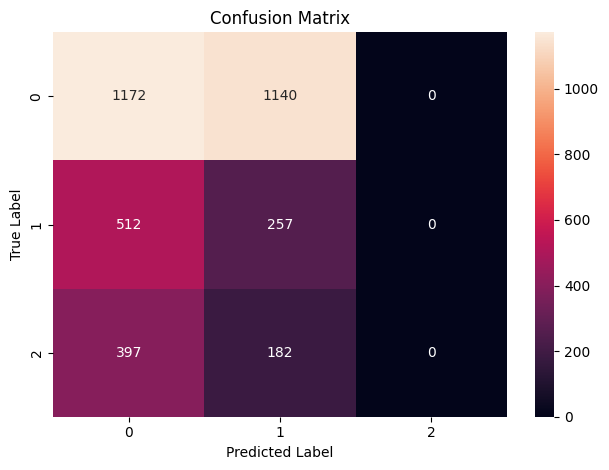

In [150]:
sns.heatmap(Confusion_matrix,annot=True,cbar=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [151]:
Review_dataset.head()

,text,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,Labelencoded_airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,1.0000,NaN,NaN,1
1,@VirginAmerica plus you've added commercials t...,positive,0.3486,NaN,0.0000,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.6837,NaN,NaN,1
3,@VirginAmerica it's really aggressive to blast...,negative,1.0000,Bad Flight,0.7033,0
4,@VirginAmerica and it's a really big bad thing...,negative,1.0000,Can't Tell,1.0000,0


In [152]:
One_dataset=Review_dataset[["text","airline_sentiment"]]

In [153]:
One_dataset.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [154]:
from sklearn.preprocessing import OneHotEncoder

In [155]:
encoder=OneHotEncoder()

In [156]:
OneHot_Label=encoder.fit_transform(One_dataset["airline_sentiment"].values.reshape(-1,1)).toarray()

In [157]:
OneHot_Label[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [158]:
x_train,x_test,y_train,y_test=train_test_split(padded_text,OneHot_Label,test_size=0.25)

In [159]:
x_test

array([[   0,    0,    0, ...,  755,   15, 1811],
       [   0,    0,    0, ...,   41,   30,  297],
       [   0,    0,    0, ...,   27,  591, 2534],
       ...,
       [   0,    0,    0, ...,   32,   33, 9669],
       [   0,    0,    0, ...,   44,  550,   54],
       [   0,    0,    0, ..., 1396,   15, 1783]], dtype=int32)

In [160]:
Model=Sequential()

In [161]:
Model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
Model.add(SpatialDropout1D(0.25))
Model.add(LSTM(50,))
Model.add(Dropout(0.25))
Model.add(Dense(3,activation="sigmoid"))

In [162]:
Model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [163]:
hist=Model.fit(x_train,y_train,validation_split=0.25, epochs=10)

Epoch 1/10
258/258 [==============================] - 19s 68ms/step - loss: 0.4741 - accuracy: 0.6655 - val_loss: 0.3814 - val_accuracy: 0.7337
Epoch 2/10
258/258 [==============================] - 19s 75ms/step - loss: 0.3408 - accuracy: 0.7713 - val_loss: 0.3357 - val_accuracy: 0.7785
Epoch 3/10
258/258 [==============================] - 20s 78ms/step - loss: 0.2452 - accuracy: 0.8566 - val_loss: 0.3208 - val_accuracy: 0.7913
Epoch 4/10
258/258 [==============================] - 21s 82ms/step - loss: 0.1798 - accuracy: 0.9047 - val_loss: 0.3366 - val_accuracy: 0.7898
Epoch 5/10
258/258 [==============================] - 21s 81ms/step - loss: 0.1328 - accuracy: 0.9315 - val_loss: 0.3750 - val_accuracy: 0.7905
Epoch 6/10
258/258 [==============================] - 22s 87ms/step - loss: 0.0993 - accuracy: 0.9511 - val_loss: 0.3980 - val_accuracy: 0.7825
Epoch 7/10
258/258 [==============================] - 23s 88ms/step - loss: 0.0830 - accuracy: 0.9615 - val_loss: 0.4247 - val_accuracy:

In [95]:
y_pred=model.predict(x_test).round()

115/115 [==============================] - 2s 13ms/step


In [96]:
y_pred

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [97]:
y_Test=np.argmax(y_test, axis=1)
y_Test[1]

1

In [98]:
accuracy=accuracy_score(y_Test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [6, 3660]

In [99]:
accuracy

0.7327868852459016

In [100]:
print(hist.history["loss"])

[0.47225233912467957, 0.3470778167247772, 0.26930299401283264, 0.19463351368904114, 0.155596524477005, 0.20599226653575897, 0.11093275994062424, 0.08512960374355316, 0.07208603620529175, 0.05797005072236061]


In [101]:
Model.evaluate(x_test,y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 3660
  y sizes: 6
Make sure all arrays contain the same number of samples.

In [102]:
Conf_metrix= confusion_matrix(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [6, 3660]

In [71]:
sns.heatmap(Conf_metrix,annot=True,cbar=True,fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

NameError: name 'Conf_metrix' is not defined

In [166]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# Example training data
y_train = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 0]])

# Fit MultiLabelBinarizer on training data
mlb = MultiLabelBinarizer()
y_train_binarized = mlb.fit_transform(y_train)

# Example test data
y_test = np.array([[1, 0, 0], [0, 1, 1], [0, 0, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0]])

# Use the fitted MultiLabelBinarizer for inverse transform
y_test_binarized = mlb.transform(y_test)

# Convert the binary predictions to the desired format
y_test_pred_formatted = [list(map(int, pred)) for pred in y_test_binarized]

# Now y_test_pred_formatted will be in the format [110], [101], [111]
print("Formatted Predictions:", y_test_pred_formatted)

# Compute the multilabel confusion matrix
conf_matrix = multilabel_confusion_matrix(y_train, y_test_binarized)

# Display the confusion matrix
for i, conf_matrix_per_class in enumerate(conf_matrix):
    print(f"Confusion Matrix for Class {i + 1}:\n", conf_matrix_per_class)


Formatted Predictions: [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]


ValueError: Multi-label binary indicator input with different numbers of labels